## Data Preparation

In [10]:
!pip install pandas

   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB 640.0 kB/s eta 0:00:19
   ---------------------------------------- 0.1/11.6 MB 1.4 MB/s eta 0:00:08
   - -------------------------------------- 0.4/11.6 MB 3.2 MB/s eta 0:00:04
   -- ------------------------------------- 0.8/11.6 MB 4.3 MB/s eta 0:00:03
   ------ --------------------------------- 1.8/11.6 MB 7.6 MB/s eta 0:00:02
   ----------------- ---------------------- 5.2/11.6 MB 18.3 MB/s eta 0:00:01
   -------------------------- ------------- 7.7/11.6 MB 23.4 MB/s eta 0:00:01
   ---------------------------------------  11.6/11.6 MB 72.6 MB/s eta 0:00:01
   ---------------------------------------  11.6/11.6 MB 72.6 MB/s eta 0:00:01
   ---------------------------------------- 11.6/11.6 MB 46.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/345.4 kB ? eta -:--:--
   --------------------------------------- 345.4/345.4 kB 10.8 MB/s eta 0:00:00

In [14]:
!pip install scikit-learn

     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.6 kB 653.6 kB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 645.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB 3.3 MB/s eta 0:00:04
   - -------------------------------------- 0.4/10.6 MB 5.4 MB/s eta 0:00:02
   -- ------------------------------------- 0.7/10.6 MB 5.9 MB/s eta 0:00:02
   ------ --------------------------------- 1.8/10.6 MB 10.5 MB/s eta 0:00:01
   --------------- ------------------------ 4.2/10.6 MB 19.2 MB/s eta 0:00:01
   --------------------- ------------------ 5.6/10.6 MB 21.1 MB/s eta 0:00:01
   ---------------------------------------  10.6/10.6 MB 43.7 MB/s eta 0:00:01
   ---------------------------------------  10.6/10.6 MB 43.7 MB/s eta 0:00:01
  

In [12]:
!pip install matplotlib

     ---------------------------------------- 0.0/162.8 kB ? eta -:--:--
     -- ------------------------------------- 10.2/162.8 kB ? eta -:--:--
     ---------------------- ---------------- 92.2/162.8 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 162.8/162.8 kB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.7 MB ? eta -:--:--
   - -------------------------------------- 0.4/7.7 MB 11.2 MB/s eta 0:00:01
   ---- ----------------------------------- 0.9/7.7 MB 9.9 MB/s eta 0:00:01
   ------------ --------------------------- 2.5/7.7 MB 15.7 MB/s eta 0:00:01
   --------------------------------- ------ 6.4/7.7 MB 31.7 MB/s eta 0:00:01
   ---------------------------------------  7.6/7.7 MB 37.6 MB/s eta 0:00:01
   ---------------------------------------- 7.7/7.7 MB 28.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/182.8 kB ? eta -:--:--
   -------------------------------------- - 174.1/182.8 kB ? eta -:--:--
   ----------------

In [7]:
!pip install tensorflow

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# randomseed
np.random.seed(0)

# data : y = ax+b
a = 2
b = 1
noise_scale = 10

# data generation
x = np.linspace(0, 50, 100)
q = np.random.normal(0, noise_scale, x.shape)
y = a * x + b + q

# # data : y = a*exp(bx)
# a = 2
# b = 1
# c= 50
# noise_scale = 20

# # data generation
# x = np.linspace(0, 5, 100)
# y = a * np.exp(b * x) + q + c

# splitting dataset to training set and testing set 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



##  Data visualization

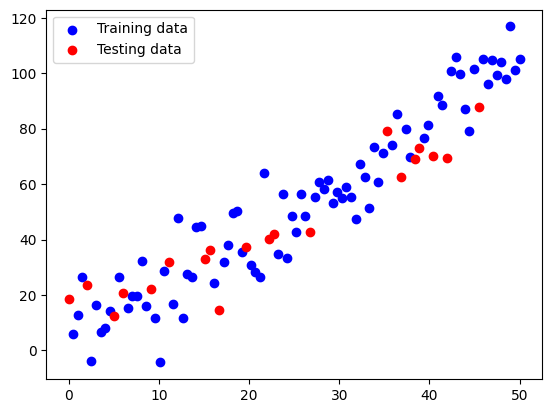

In [16]:
plt.scatter(x_train, y_train, color='blue', label='Training data')
plt.scatter(x_test, y_test, color='red', label='Testing data')
plt.legend()
plt.show()


## Build ANN model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# model = Sequential([
#     Dense(1, input_shape=(1,), activation='linear')
# ])

model = Sequential([
    Dense(5, input_shape=(1,), activation='relu'),
    Dense(3, activation='relu'),
    Dense(1, activation='linear')
])

# Sequential.help
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')


## Training ANN model

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(x_train, y_train, validation_split=0.2, epochs=200, batch_size=2)

Epoch 1/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2612.2354 - val_loss: 2502.0930
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1658.3502 - val_loss: 545.0250
Epoch 3/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 245.2421 - val_loss: 81.6562
Epoch 4/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 97.0376 - val_loss: 82.1079
Epoch 5/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 119.2449 - val_loss: 83.0231
Epoch 6/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 122.7118 - val_loss: 81.4334
Epoch 7/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 124.4760 - val_loss: 82.6845
Epoch 8/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 123.7240 - val_loss: 83.0516
Epoch 9/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 119.9991 - val_loss: 84.8084
Epoch 10/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 118.3142 - val_loss: 82.4670
Epoch 11/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 108.3879 - val_loss: 96.9413
Epoch 12/200
32/32 ━━━━━━━

## Model evaluation

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 83.1108


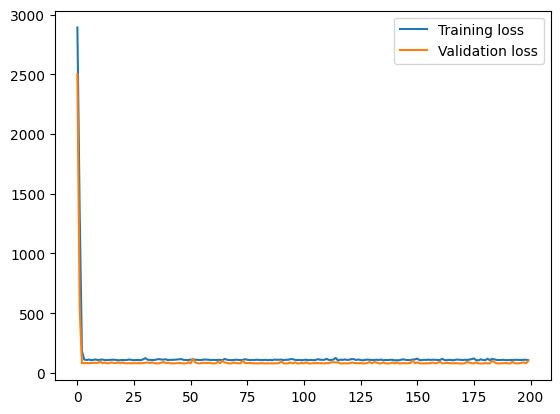

In [20]:
# model.evaluate(x_test, y_test)
loss = model.evaluate(x_test, y_test)

# 繪製訓練歷史
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


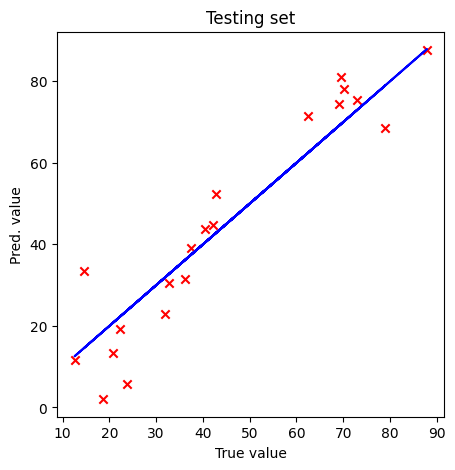

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


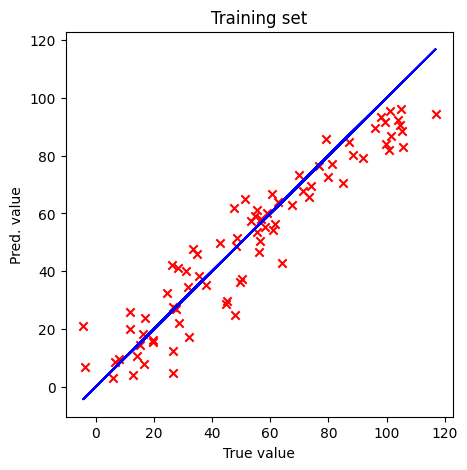

In [21]:
def plot_scatter (x, y, title, x_label, y_label,n):
    # plt.subplot(2, 2, n);
    plt.figure(figsize=(5, 5));
    plt.plot(x, x, color="blue", label="d")
    plt.scatter(x, y, marker="x", color="red")
    # plt.axis((0,210, 0,210))
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

y_pred = model.predict(x_test)
plot_scatter(y_test, y_pred, "Testing set", "True value", "Pred. value",1)

y_pred = model.predict(x_train)
plot_scatter(y_train, y_pred, "Training set", "True value", "Pred. value",2)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step


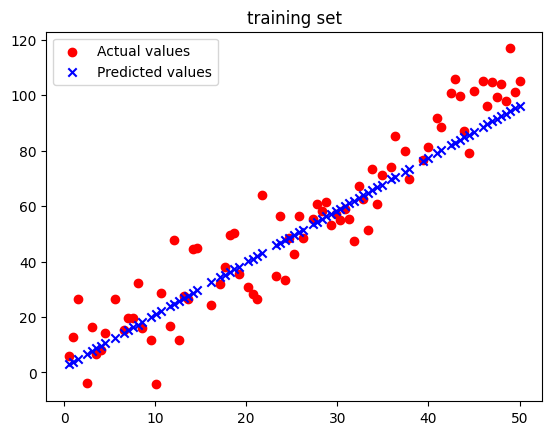

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


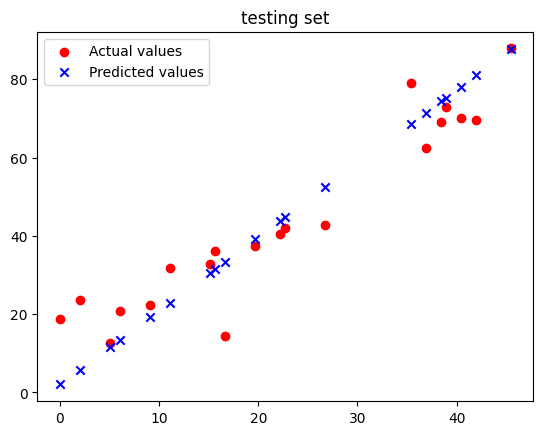

In [22]:
y_pred = model.predict(x_train)
plt.scatter(x_train, y_train, color='red', label='Actual values')
plt.scatter(x_train, y_pred, color='blue', marker='x', label='Predicted values')
plt.title('training set')
plt.legend()
plt.show()


y_pred = model.predict(x_test)
plt.scatter(x_test, y_test, color='red', label='Actual values')
plt.scatter(x_test, y_pred, color='blue', marker='x', label='Predicted values')
plt.title('testing set')
plt.legend()
plt.show()

### Exercise : Please try to write R2 and Pearson correlation function for evaluating the training model

### Coefficient of determination, denoted R2
R2值衡量的是模型解釋的"變異"量相對於總變異量的比例。R2=1意味著模型完美地擬合了數據，能夠解釋所有的變異性；而R2=0代表著模型沒有解釋任何變異量，即它未能捕捉到y和y^之間的任何關係，意味著線性模型沒有提供超越基線模型（即常數模型，這個模型預測的 y 值對於所有觀察值都是 y 的平均值）的預測能力預測能力

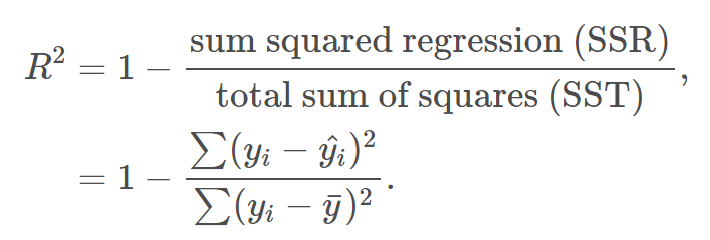

Reference :

https://en.wikipedia.org/wiki/Coefficient_of_determination

https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html

In [24]:
from sklearn.metrics import r2_score

R2 = r2_score(y_pred,y_test) #y_pred is an 1-D array
#if y_pred is multi-dimensional, use y_pred = np.squeeze(y_pred)

print(R2)

0.8855070778338736


## Pearson correlation function
#### The Pearson correlation measures the strength of the linear relationship between two variables. It has a value between -1 to 1, with a value of -1 meaning a total negative linear correlation, 0 being no correlation, and + 1 meaning a total positive correlation.

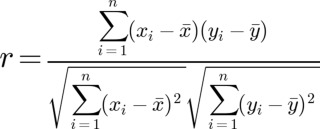

餘弦相似度的定義是兩個向量的點積除以這兩個向量模的乘積：

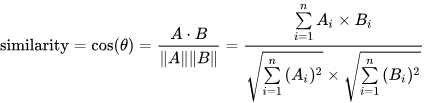
​

In [25]:
from sklearn.metrics.pairwise import cosine_similarity
Pearson = cosine_similarity([y_pred, y_test])

print(Pearson[0,1])

0.9847078163347079
